In [166]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, cross_val_score

import scipy.stats as stats
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [167]:
df = pd.read_csv('Medical Insurance Train Data.csv')
print(df.head())
print(df.isna().sum())
print(df.nunique())

         age     sex        bmi smoker     region  children       charges
0  21.000000    male  25.745000     no  northeast         2   3279.868550
1  36.976978  female  25.744165    yes  southeast         3  21454.494239
2  18.000000    male  30.030000     no  southeast         1   1720.353700
3  37.000000    male  30.676891     no  northeast         3   6801.437542
4  58.000000    male  32.010000     no  southeast         1  11946.625900
age         0
sex         0
bmi         0
smoker      0
region      0
children    0
charges     0
dtype: int64
age         1589
sex            2
bmi         2322
smoker         2
region         4
children       6
charges     2951
dtype: int64


In [168]:
df2 = pd.read_csv('Medical Insurance Test Data.csv')
print(df2.head())
print(df2.isna().sum())
print(df2.nunique())

         age     sex        bmi smoker     region  children
0  40.000000    male  29.900000     no  southwest         2
1  47.000000    male  32.300000     no  southwest         1
2  54.000000  female  28.880000     no  northeast         2
3  37.000000    male  30.568094     no  northeast         3
4  59.130049    male  33.132854    yes  northeast         4
age         0
sex         0
bmi         0
smoker      0
region      0
children    0
dtype: int64
age         318
sex           2
bmi         459
smoker        2
region        4
children      6
dtype: int64


In [169]:
# ------------------------------------------------------------------------ TRAINING THE MODEL ON TRAINING DATA ------------------------------------------------------------------------
text = ['sex', 'smoker', 'region']
num = ['age', 'bmi', 'children']

trf = ColumnTransformer([
    ('trf1', OneHotEncoder(drop='first', sparse_output=False), text),
    ('trf2', StandardScaler(), num),
    # ('trf3', LabelEncoder(), df['charges'])       # you cant use label encoder inside a column transformer on the target column
], remainder='passthrough')

pipe = Pipeline([
    ('trf', trf),
    ('reg', LinearRegression())
])

x = df.iloc[:, :6]
y = df.iloc[:, 6:7]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

pipe.fit(x_train, y_train)



# ------------------------------------------------------------------------ TRAINING THE MODEL TEST DATA ------------------------------------------------------------------------

# as ColumnTransformer and Pipeline is alredy made, hence we dont need to make it again

# prediction from former trainig data
y_test_predict = pipe.predict(x_test)
print(f"ACCURACY SCORE : {np.round(r2_score(y_test, y_test_predict), 2)*100} %")         # for continuous data in regression we have to use r2_score

# prediction on test data
y_pred_new = pipe.predict(df2)
y_pred_new = pd.DataFrame(y_pred_new, columns=['charges pred'])

# combini df2 and predicted data
data = pd.concat([df2, y_pred_new], axis=1)
data.head()

ACCURACY SCORE : 75.0 %


,age,sex,bmi,smoker,region,children,charges pred
0,40.000000,male,29.900000,no,southwest,2,8928.607865
1,47.000000,male,32.300000,no,southwest,1,10741.515723
2,54.000000,female,28.880000,no,northeast,2,13237.478527
3,37.000000,male,30.568094,no,northeast,3,11170.853738
4,59.130049,male,33.132854,yes,northeast,4,40407.576176


### Plotting Graphs

In [170]:
text = ['sex', 'smoker', 'region']
num = ['age', 'bmi', 'children']


y = y_pred_new.copy()

trf2 = ColumnTransformer([
    ('t1', OneHotEncoder(drop='first', sparse_output=False), text),
    ('t2', StandardScaler(), num)
], remainder='passthrough')

x_train2 = trf2.fit_transform(df2)

# as agter encoding the columns they always returns an array, hence first we have to convert them into DataFrames
x_train2 = pd.DataFrame(x_train2)

y = pd.DataFrame(y)

data2 = pd.concat([x_train2, y], axis=1)
data2








,0,1,2,3,4,5,6,7,charges pred
0,1.0,0.0,0.0,0.0,1.0,0.093535,-0.144446,-0.304406,8928.607865
1,1.0,0.0,0.0,0.0,1.0,0.658226,0.298314,-0.898724,10741.515723
2,0.0,0.0,0.0,0.0,0.0,1.222918,-0.332619,-0.304406,13237.478527
3,1.0,0.0,0.0,0.0,0.0,-0.148476,-0.021194,0.289911,11170.853738
4,1.0,1.0,0.0,0.0,0.0,1.636760,0.451961,0.884228,40407.576176
...,...,...,...,...,...,...,...,...,...
487,1.0,0.0,0.0,0.0,0.0,0.980907,-0.542929,-0.898724,12723.867487
488,1.0,0.0,0.0,0.0,1.0,-0.471157,2.161593,1.478546,12228.996246
489,1.0,0.0,0.0,0.0,0.0,0.720342,-0.298560,0.884228,13899.334484
490,0.0,0.0,0.0,1.0,0.0,0.217020,-1.184773,1.478546,8594.630711


In [171]:
text = ['sex', 'smoker', 'region']
num = ['age', 'bmi', 'children']

y = y_pred_new.copy()   

trf2 = ColumnTransformer([
    ('t1', OneHotEncoder(sparse_output=False), text),
    ('t2', StandardScaler(), num)
], remainder='passthrough')


x_train2 = trf2.fit_transform(df2)

ohe_cols = trf2.named_transformers_['t1'].get_feature_names_out(text)       # this way of getting feature name only works with one hot encoding
num_cols = num
rem_cols = [col for col in x_train.columns if col not in text + num]

cols_final = list(ohe_cols) + num_cols + rem_cols       # since ohe_cols is an array, hence we have converted it into a list
print(cols_final, "\n")

# convert transformed data to DF with correct cols and index
x_train2 = pd.DataFrame(x_train2, columns=cols_final)

# combine x and y
data2 = pd.concat([x_train2, y], axis=1)
data2



['sex_female', 'sex_male', 'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest', 'age', 'bmi', 'children'] 



,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,age,bmi,children,charges pred
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.093535,-0.144446,-0.304406,8928.607865
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.658226,0.298314,-0.898724,10741.515723
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.222918,-0.332619,-0.304406,13237.478527
3,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,-0.148476,-0.021194,0.289911,11170.853738
4,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.636760,0.451961,0.884228,40407.576176
...,...,...,...,...,...,...,...,...,...,...,...,...
487,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.980907,-0.542929,-0.898724,12723.867487
488,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.471157,2.161593,1.478546,12228.996246
489,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.720342,-0.298560,0.884228,13899.334484
490,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.217020,-1.184773,1.478546,8594.630711


['sex', 'smoker', 'region', 'age', 'bmi', 'children'] 

     sex  smoker  region       age       bmi  children  charges pred
0    1.0     0.0     3.0  0.093535 -0.144446 -0.304406   8928.607865
1    1.0     0.0     3.0  0.658226  0.298314 -0.898724  10741.515723
2    0.0     0.0     0.0  1.222918 -0.332619 -0.304406  13237.478527
3    1.0     0.0     0.0 -0.148476 -0.021194  0.289911  11170.853738
4    1.0     1.0     0.0  1.636760  0.451961  0.884228  40407.576176
..   ...     ...     ...       ...       ...       ...           ...
487  1.0     0.0     0.0  0.980907 -0.542929 -0.898724  12723.867487
488  1.0     0.0     3.0 -0.471157  2.161593  1.478546  12228.996246
489  1.0     0.0     0.0  0.720342 -0.298560  0.884228  13899.334484
490  0.0     0.0     2.0  0.217020 -1.184773  1.478546   8594.630711
491  1.0     1.0     3.0 -0.229146  0.501245 -0.304406  31567.525784

[492 rows x 7 columns] 



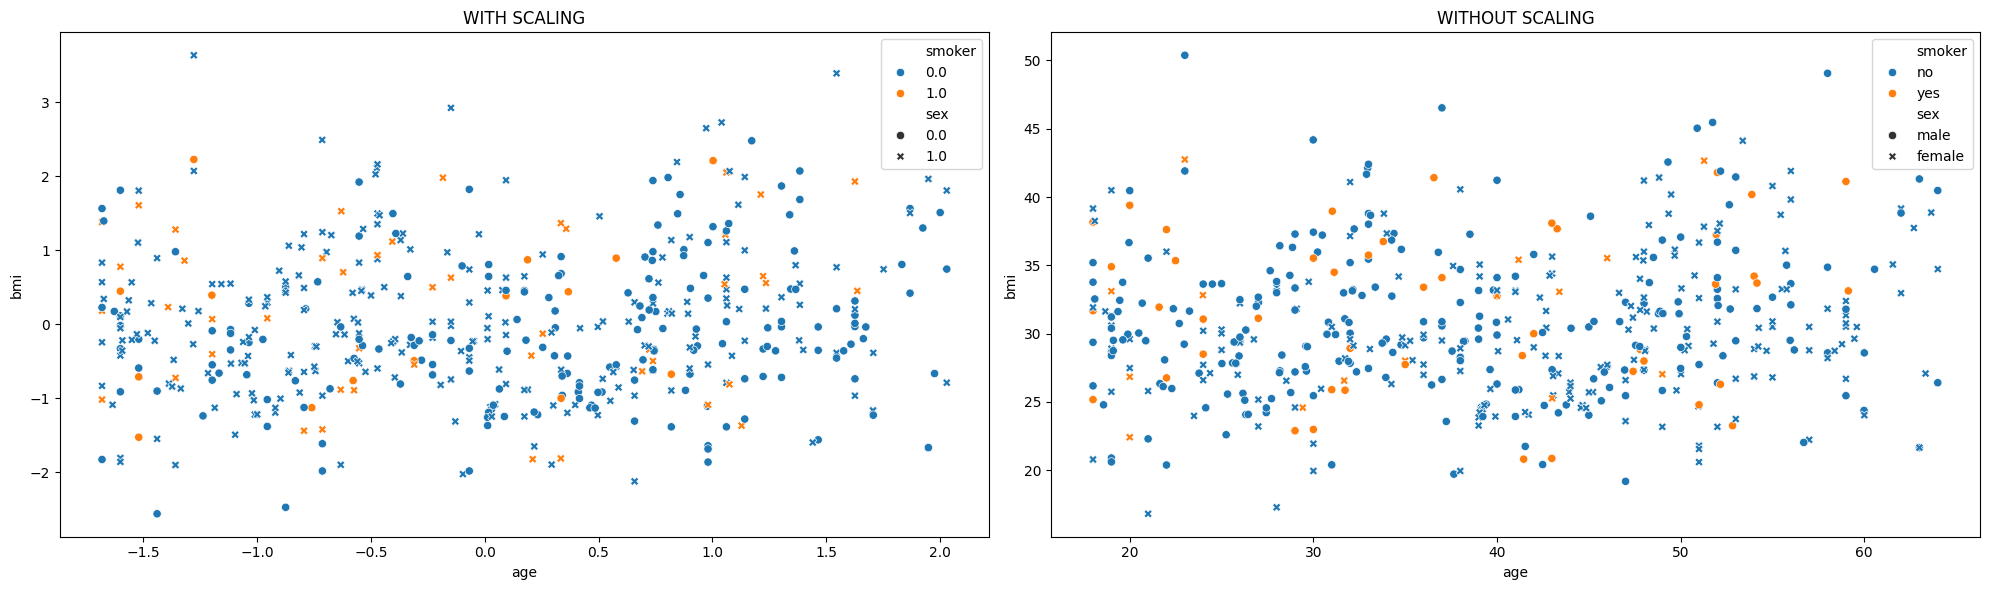

In [172]:
text = ['sex', 'smoker', 'region']
num = ['age', 'bmi', 'children']

y = y_pred_new.copy()   

trf2 = ColumnTransformer([
    ('t1', OrdinalEncoder(), text),
    ('t2', StandardScaler(), num)
], remainder='passthrough')


x_train2 = trf2.fit_transform(df2)

or_cols = text
num_cols = num
rem_cols = [col for col in x_train.columns if col not in text + num]

cols_final = list(or_cols) + num_cols + rem_cols       # since ohe_cols is an array, hence we have converted it into a list
print(cols_final, "\n")

# convert transformed data to DF with correct cols and index
x_train2 = pd.DataFrame(x_train2, columns=cols_final)

# combine x and y
data2 = pd.concat([x_train2, y], axis=1)
print(data2, "\n")


# *******************************************************************************************

plt.figure(figsize=(20,6))

plt.subplot(121)
sns.scatterplot(data2, x='age', y='bmi', hue='smoker', style='sex')
plt.title('WITH SCALING')
# When we used OrdinalEncoder, it assigned numbers based on alphabetical order. So here femaele = 0 and male = 1


plt.subplot(122)
sns.scatterplot(df2, x='age', y='bmi', hue='smoker', style='sex')
plt.title('WITHOUT SCALING')

plt.tight_layout()
plt.show()





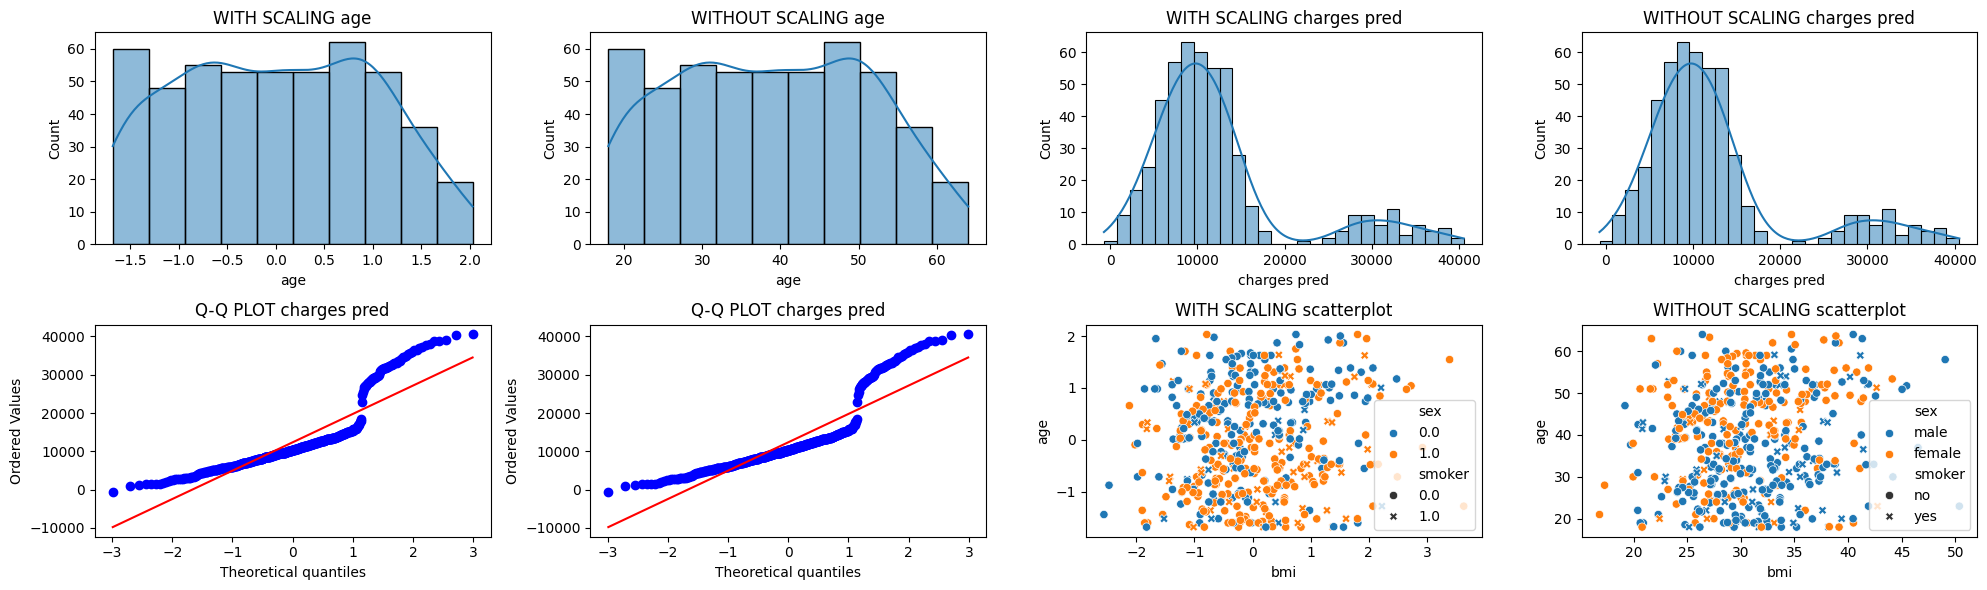

In [ ]:
df2_y = pd.concat([df2, y], axis=1)

plt.figure(figsize=(20,6))

plt.subplot(241)
sns.histplot(data2['age'], kde=True)
plt.title('WITH SCALING age')
# When we used OrdinalEncoder, it assigned numbers based on alphabetical order. So here femaele = 0 and male = 1
# hence i should recommend, when assigning ordinal encoding for plotting you should use manually doing the ordinal encoding

plt.subplot(242)
sns.histplot(df2_y['age'], kde=True)
plt.title('WITHOUT SCALING age')

plt.subplot(243)
sns.histplot(data2['charges pred'], kde=True)   # completely right skewed
plt.title('WITH SCALING charges pred')

plt.subplot(244)
sns.histplot(df2_y['charges pred'], kde=True)   # completely right skewed
plt.title('WITHOUT SCALING charges pred')

plt.subplot(245)
stats.probplot(data2['charges pred'], dist='norm', plot=plt)    # QQ PLOT IS NOT APPLIED ANY SCALING
plt.title('Q-Q PLOT charges pred')

plt.subplot(246)
stats.probplot(df2_y['charges pred'], dist='norm', plot=plt)    # QQ PLOT IS NOT APPLIED ANY SCALING
plt.title('Q-Q PLOT charges pred')

plt.subplot(247)
sns.scatterplot(data2, x='bmi', y='age', hue='sex', style='smoker')
plt.title('WITH SCALING scatterplot')

plt.subplot(248)
sns.scatterplot(df2_y, x='bmi', y='age', hue='sex', style='smoker')
plt.title('WITHOUT SCALING scatterplot')



plt.tight_layout()
plt.show()



